In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
# import scipy
import itertools
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import matplotlib.style as style
from sklearn.datasets import make_blobs


def initiate_pandas(max_cols, cons_width):
    pd.set_option('display.max_columns', max_cols)
    pd.set_option('display.max_rows', 250)
    pd.set_option('display.width', cons_width)  # make output in console wider

df = pd.read_csv("CSV output/clustering_ready")
print(df.shape)
print("Columns that go into Kmeans:")
print(df.columns)
print(df.shape)

std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print(df_scaled.head())

(99, 25)
Columns that go into Kmeans:
Index(['x_mean', 'y_mean', 'z_mean', 'hz_mean', 'x_range', 'y_range',
       'z_range', 'x_min', 'y_min', 'z_min', 'x_max', 'y_max', 'z_max',
       'x_fft_mean', 'y_fft_mean', 'z_fft_mean', 'x_fft_range', 'y_fft_range',
       'z_fft_range', 'x_fft_min', 'y_fft_min', 'z_fft_min', 'x_fft_max',
       'y_fft_max', 'z_fft_max'],
      dtype='object')
(99, 25)
     x_mean    y_mean    z_mean   hz_mean   x_range   y_range   z_range  \
0  1.308665  0.278317  0.600697  0.311668 -0.588085 -0.436247 -0.365093   
1  0.450917  0.282490  0.395946  0.246291 -0.743796 -0.585601 -0.627102   
2  0.617875  0.311606  0.359151  0.904674 -0.089809 -0.336677 -0.745006   
3  0.624502  0.297814  0.419938  0.707996 -0.759367 -0.722510 -0.771207   
4  0.737792  0.306134  0.441076 -0.085470 -0.276662 -0.349123 -1.020115   

      x_min     y_min     z_min  ...  z_fft_mean  x_fft_range  y_fft_range  \
0  0.440633  0.084337  0.485572  ...   -0.093257    -0.957069    -0.74175

In [25]:
combinations = list(itertools.combinations(df.columns, 2))
print(combinations)

[('x_mean', 'y_mean'), ('x_mean', 'z_mean'), ('x_mean', 'hz_mean'), ('x_mean', 'x_range'), ('x_mean', 'y_range'), ('x_mean', 'z_range'), ('x_mean', 'x_min'), ('x_mean', 'y_min'), ('x_mean', 'z_min'), ('x_mean', 'x_max'), ('x_mean', 'y_max'), ('x_mean', 'z_max'), ('x_mean', 'x_fft_mean'), ('x_mean', 'y_fft_mean'), ('x_mean', 'z_fft_mean'), ('x_mean', 'x_fft_range'), ('x_mean', 'y_fft_range'), ('x_mean', 'z_fft_range'), ('x_mean', 'x_fft_min'), ('x_mean', 'y_fft_min'), ('x_mean', 'z_fft_min'), ('x_mean', 'x_fft_max'), ('x_mean', 'y_fft_max'), ('x_mean', 'z_fft_max'), ('y_mean', 'z_mean'), ('y_mean', 'hz_mean'), ('y_mean', 'x_range'), ('y_mean', 'y_range'), ('y_mean', 'z_range'), ('y_mean', 'x_min'), ('y_mean', 'y_min'), ('y_mean', 'z_min'), ('y_mean', 'x_max'), ('y_mean', 'y_max'), ('y_mean', 'z_max'), ('y_mean', 'x_fft_mean'), ('y_mean', 'y_fft_mean'), ('y_mean', 'z_fft_mean'), ('y_mean', 'x_fft_range'), ('y_mean', 'y_fft_range'), ('y_mean', 'z_fft_range'), ('y_mean', 'x_fft_min'), ('y_

In [26]:
score_dict = dict()
for feature1,feature2 in combinations:
    X = df_scaled[[feature1, feature2]]
    for number_of_clusters in range(2,5):
        km = KMeans(random_state=42,n_clusters=number_of_clusters)
        km.fit(X)
        sil_score= silhouette_score(X, km.labels_)
        score_dict[sil_score] = (feature1, feature2, number_of_clusters)

0.8815100697717394


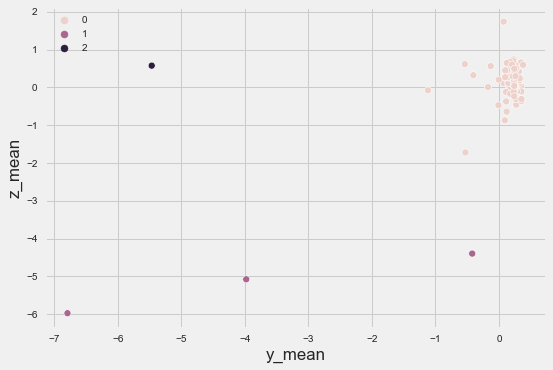

0.8270830968692087


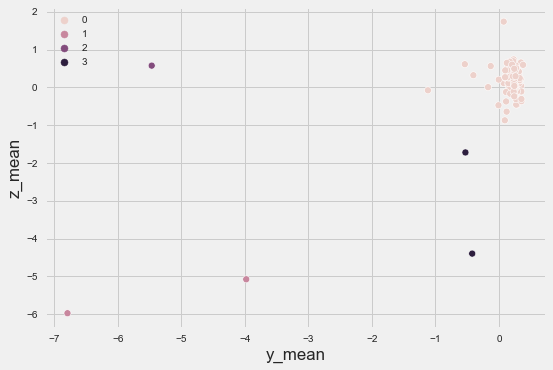

0.7448027684856001


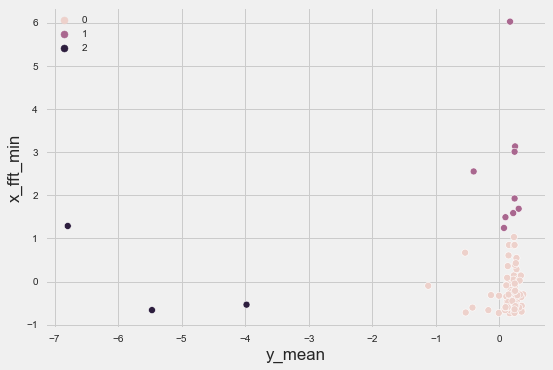

0.7091040808389085


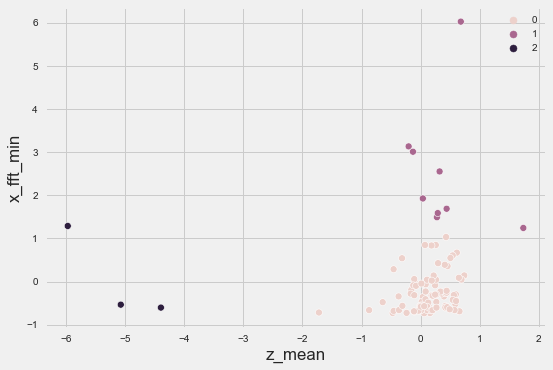

0.6780814455273909


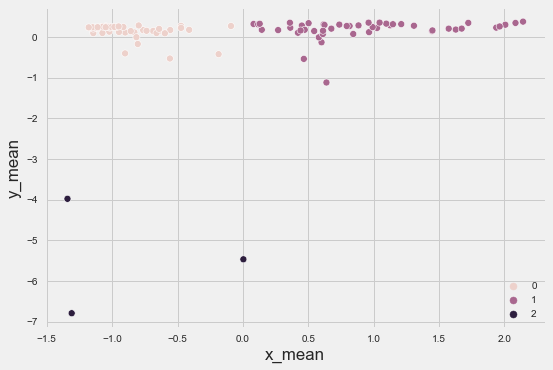

In [27]:
score_dict_keys = list(score_dict.keys())
score_dict_keys = sorted(score_dict_keys,reverse=True)
features_list = []
for key in score_dict_keys[0:50]:
    nr_clusters = score_dict[key][2]
    if nr_clusters >= 3:
        print(key)
        feature1 = score_dict[key][0]
        feature2 = score_dict[key][1]
        features_list.append(feature1)
        features_list.append(feature2)
        km = KMeans(random_state=42, n_clusters=nr_clusters)
        X = df_scaled[[feature1,feature2]]
        km.fit(X)
        sns.scatterplot(data=df_scaled, x=feature1, y=feature2, hue=km.labels_)
        plt.show()
# c = Counter(features_list)

In [28]:
# https://trello.com/b/czJSpr2F/challenge-clustering
# https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891
# https://towardsdatascience.com/clustering-with-more-than-two-features-try-this-to-explain-your-findings-b053007d680a

In [29]:
df_best_features = df_scaled[["y_mean","x_mean","z_mean",
                       "y_range","z_range", "x_fft_mean",
                        "x_fft_max","y_fft_max","z_fft_range"]]
combinations = list(itertools.combinations(df_best_features,2))
print(len(combinations))
# for feature1,feature2 in combinations:
#     X = df_scaled[[feature1, feature2]].values
#     range_n_clusters = [2, 3, 4, 5, 6]
#     silhouette_avg_n_clusters = []
#     for n_clusters in range_n_clusters:
#         # Create a subplot with 1 row and 2 columns
#         fig, (ax1, ax2) = plt.subplots(1, 2)
#         fig.set_size_inches(18, 7)
#
#         # The 1st subplot is the silhouette plot
#         # The silhouette coefficient can range from -1, 1 but in this example all
#         # lie within [-0.1, 1]
#         ax1.set_xlim([-0.4, 1])
#         # The (n_clusters+1)*10 is for inserting blank space between silhouette
#         # plots of individual clusters, to demarcate them clearly.
#         ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
#
#         # Initialize the clusterer with n_clusters value and a random generator
#         # seed of 10 for reproducibility.
#         clusterer = KMeans(n_clusters=n_clusters, random_state=42,n_init=400,max_iter=500)
#         cluster_labels = clusterer.fit_predict(X)
#
#         # The silhouette_score gives the average value for all the samples.
#         # This gives a perspective into the density and separation of the formed
#         # clusters
#         silhouette_avg = silhouette_score(X, cluster_labels)
#         print(f"For {n_clusters} clusters:  "
#               "The average silhouette_score is :", silhouette_avg)
#
#         silhouette_avg_n_clusters.append(silhouette_avg)
#         # Compute the silhouette scores for each sample
#         sample_silhouette_values = silhouette_samples(X, cluster_labels)
#
#         y_lower = 10
#         for i in range(n_clusters):
#             # Aggregate the silhouette scores for samples belonging to
#             # cluster i, and sort them
#             ith_cluster_silhouette_values = \
#                 sample_silhouette_values[cluster_labels == i]
#
#             ith_cluster_silhouette_values.sort() #Per cluster, aantal punten + score.
#
#
#             size_cluster_i = ith_cluster_silhouette_values.shape[0]
#             y_upper = y_lower + size_cluster_i
#
#             color = cm.nipy_spectral(float(i) / n_clusters)
#             ax1.fill_betweenx(np.arange(y_lower, y_upper),
#                               0, ith_cluster_silhouette_values,
#                               facecolor=color, edgecolor=color, alpha=0.7)
#
#             # Label the silhouette plots with their cluster numbers at the middle
#             ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
#
#             # Compute the new y_lower for next plot
#             y_lower = y_upper + 10  # 10 for the 0 samples
#
#         ax1.set_title("The silhouette plot for the various clusters.")
#         ax1.set_xlabel("The silhouette coefficient values")
#         ax1.set_ylabel("Cluster label")
#
#         # The vertical line for average silhouette score of all the values
#         ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
#
#         ax1.set_yticks([])  # Clear the yaxis labels / ticks
#         ax1.set_xticks([-0.4,-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
#
#         # 2nd Plot showing the actual clusters formed
#         colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#         ax2.scatter(X[:, 0], X[:, 1], marker='.', s=45, lw=0, alpha=0.7,
#                     c=colors, edgecolor='k')
#
#         # Labeling the clusters
#         centers = clusterer.cluster_centers_
#         # Draw white circles at cluster centers
#         ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                     c="white", alpha=1, s=200, edgecolor='k')
#
#         for i, c in enumerate(centers):
#             ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                         s=50, edgecolor='k')
#
#         ax2.set_title("The visualization of the clustered data.")
#         ax2.set_xlabel(f"{feature1}")
#         ax2.set_ylabel(f"{feature2}")
#
#         plt.suptitle((f"Silhouette score for KMeans clustering on data "
#                       f"with {n_clusters} clusters = {silhouette_avg} "),
#                      fontsize=14, fontweight='bold')
#
#     plt.show()
#
#
# style.use("fivethirtyeight")
# plt.plot(range_n_clusters, silhouette_avg_n_clusters)
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("silhouette score")
# plt.show()

36


In [30]:
combinations = list(itertools.combinations(df_best_features,3))
print(len(combinations))

84


In [31]:
# for feature1,feature2, feature3 in combinations:
#     X = df_scaled[[feature1, feature2, feature3]].values
#     range_n_clusters = [3, 4, 5]
#     silhouette_avg_n_clusters = []
#     print("features:")
#     print(f"{feature1}, {feature2} ,{feature3}")
#     for n_clusters in range_n_clusters:
#         # Create a subplot with 1 row and 2 columns
#         fig, (ax1, ax2) = plt.subplots(1, 2)
#         fig.set_size_inches(18, 7)
#
#         # The 1st subplot is the silhouette plot
#         # The silhouette coefficient can range from -1, 1 but in this example all
#         # lie within [-0.1, 1]
#         ax1.set_xlim([-0.4, 1])
#         # The (n_clusters+1)*10 is for inserting blank space between silhouette
#         # plots of individual clusters, to demarcate them clearly.
#         ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
#
#         # Initialize the clusterer with n_clusters value and a random generator
#         # seed of 10 for reproducibility.
#         clusterer = KMeans(n_clusters=n_clusters, random_state=42,n_init=400,max_iter=500)
#         cluster_labels = clusterer.fit_predict(X)
#
#         # The silhouette_score gives the average value for all the samples.
#         # This gives a perspective into the density and separation of the formed
#         # clusters
#         silhouette_avg = silhouette_score(X, cluster_labels)
#         print(f"For {n_clusters} clusters:  "
#               "The average silhouette_score is :", silhouette_avg)
#
#         silhouette_avg_n_clusters.append(silhouette_avg)
#         # Compute the silhouette scores for each sample
#         sample_silhouette_values = silhouette_samples(X, cluster_labels)
#
#         y_lower = 10
#         for i in range(n_clusters):
#             # Aggregate the silhouette scores for samples belonging to
#             # cluster i, and sort them
#             ith_cluster_silhouette_values = \
#                 sample_silhouette_values[cluster_labels == i]
#
#             ith_cluster_silhouette_values.sort() #Per cluster, aantal punten + score.
#
#
#             size_cluster_i = ith_cluster_silhouette_values.shape[0]
#             y_upper = y_lower + size_cluster_i
#
#             color = cm.nipy_spectral(float(i) / n_clusters)
#             ax1.fill_betweenx(np.arange(y_lower, y_upper),
#                               0, ith_cluster_silhouette_values,
#                               facecolor=color, edgecolor=color, alpha=0.7)
#
#             # Label the silhouette plots with their cluster numbers at the middle
#             ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
#
#             # Compute the new y_lower for next plot
#             y_lower = y_upper + 10  # 10 for the 0 samples
#
#         ax1.set_title("The silhouette plot for the various clusters.")
#         ax1.set_xlabel("The silhouette coefficient values")
#         ax1.set_ylabel("Cluster label")
#
#         # The vertical line for average silhouette score of all the values
#         ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
#
#         ax1.set_yticks([])  # Clear the yaxis labels / ticks
#         ax1.set_xticks([-0.4,-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
#
#         # 2nd Plot showing the actual clusters formed
#         colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#         ax2.scatter(X[:, 0], X[:, 1], marker='.', s=75, lw=0, alpha=0.7,
#                     c=colors, edgecolor='k')
#
#         # Labeling the clusters
#         centers = clusterer.cluster_centers_
#         # Draw white circles at cluster centers
#         ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                     c="white", alpha=1, s=200, edgecolor='k')
#
#         for i, c in enumerate(centers):
#             ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                         s=50, edgecolor='k')
#
#         ax2.set_title("The visualization of the clustered data.")
#         ax2.set_xlabel(f"{feature1}")
#         ax2.set_ylabel(f"{feature2}")
#
#         plt.suptitle((f"Silhouette score for KMeans clustering on data "
#                       f"with {n_clusters} clusters = {silhouette_avg} "),
#                      fontsize=14, fontweight='bold')
#
#     plt.show()
#
#
# style.use("fivethirtyeight")
# plt.plot(range_n_clusters, silhouette_avg_n_clusters)
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("silhouette score")
# plt.show()

In [32]:
best_columns_3 = list({"y_mean", "x_mean" ,"y_range",
                       "y_mean", "y_range" ,"x_fft_max",
                       "y_mean", "y_range" ,"y_fft_max",
                       "y_mean", "x_fft_max" ,"y_fft_max",
                       "x_fft_max", "y_fft_max" ,"z_fft_range"})
df_best_features_4 = df_scaled[best_columns_3]
combinations = list(itertools.combinations(df_best_features_4,4))
print(len(combinations))

15


[]
features:
['x_fft_max', 'y_mean', 'y_fft_max', 'y_range']
For 3 clusters:  The average silhouette_score is : 0.49385435926442306
For 4 clusters:  The average silhouette_score is : 0.3929910404546403
For 5 clusters:  The average silhouette_score is : 0.41958556438976713


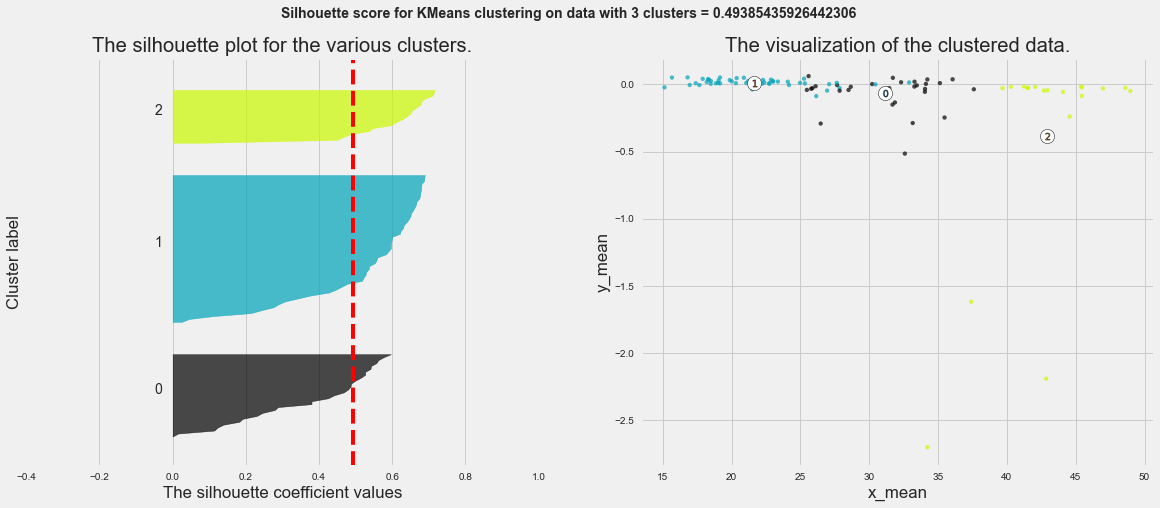

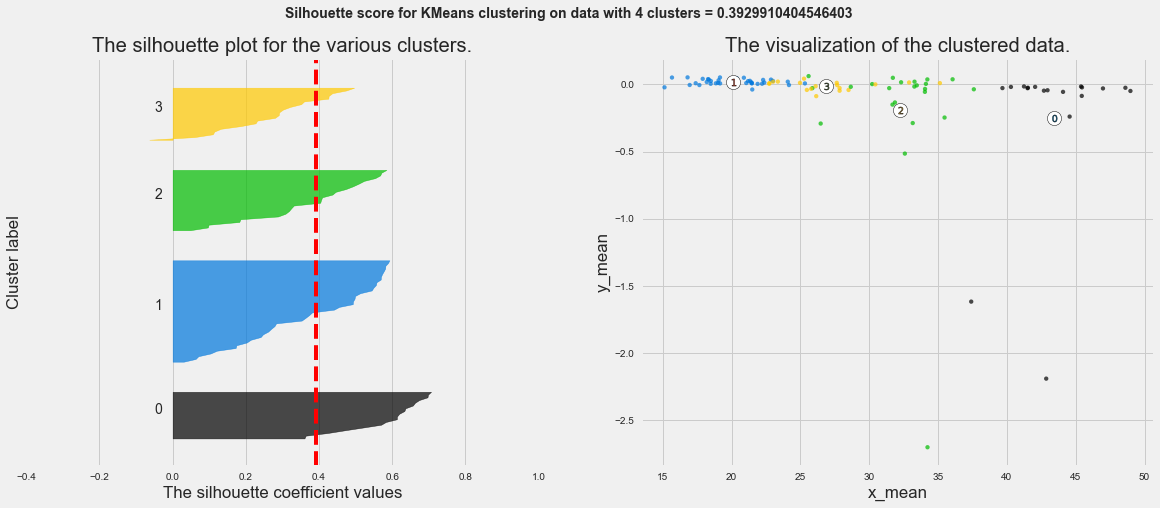

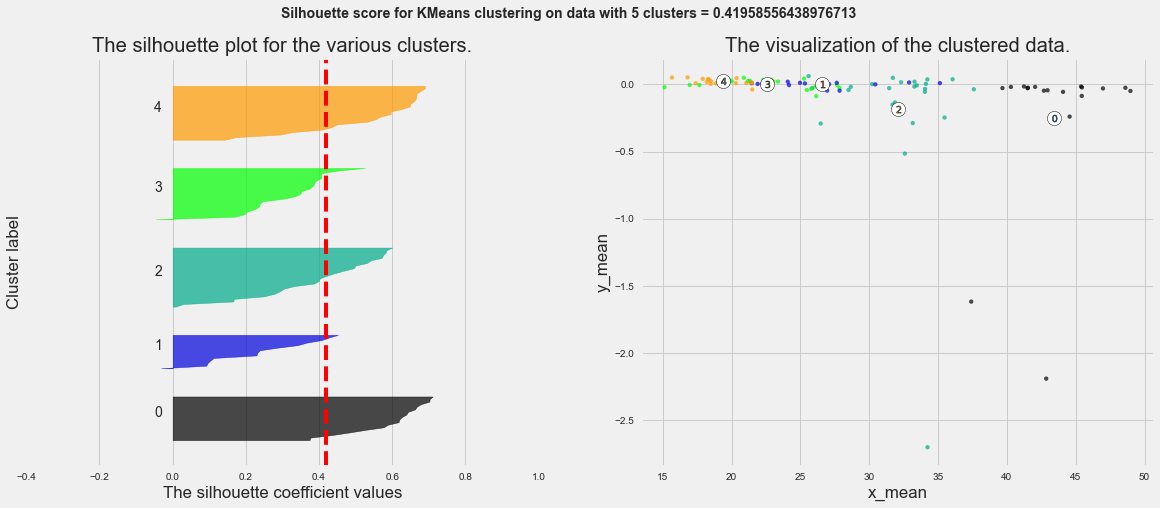

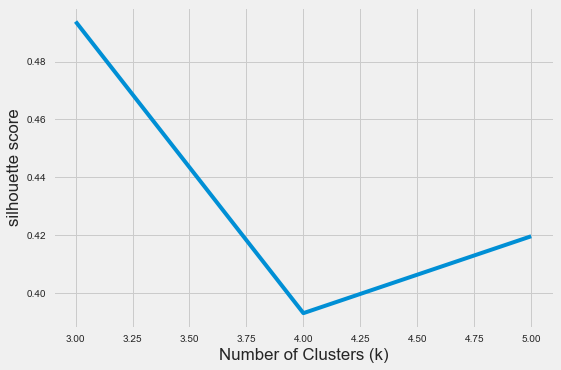

In [41]:
combinations=[(['x_fft_max', 'y_mean', 'y_fft_max', 'y_range'])]
for features in combinations:
    X = df_scaled[[*features]].values
    range_n_clusters = [3, 4, 5]
    silhouette_avg_n_clusters = []
    print(silhouette_avg_n_clusters)
    print("features:")
    print(f"{[*features]}")
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.4, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=42,n_init=400,max_iter=500)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(f"For {n_clusters} clusters:  "
              "The average silhouette_score is :", silhouette_avg)

        silhouette_avg_n_clusters.append(silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort() #Per cluster, aantal punten + score.


            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.4,-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=75, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel(f"{feature1}")
        ax2.set_ylabel(f"{feature2}")

        plt.suptitle((f"Silhouette score for KMeans clustering on data "
                      f"with {n_clusters} clusters = {silhouette_avg} "),
                     fontsize=14, fontweight='bold')
    plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

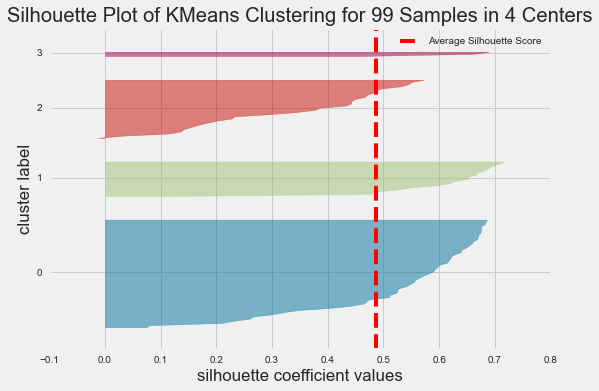

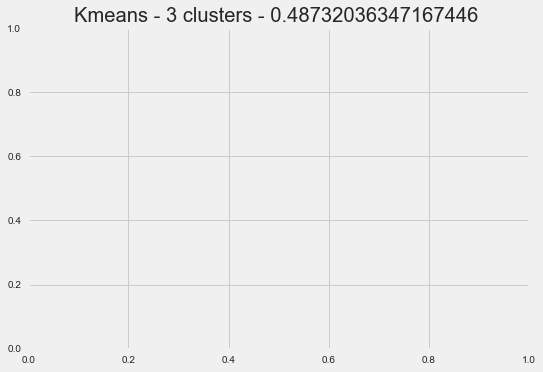

In [40]:
# https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam
from yellowbrick.cluster import silhouette_visualizer

# Load a clustering dataset
X = df_scaled[['x_fft_max', 'y_mean', 'y_fft_max', 'y_range']].values


# Use the quick method and immediately show the figure

km = KMeans(4, random_state=42)
km.fit(X)

sil_score= silhouette_score(X, km.labels_)
silhouette_visualizer(km, X, colors='yellowbrick')
plt.title(f"Kmeans - 3 clusters - {sil_score} ")
plt.show()